## Description Cell
[describe the contents of this notebook]

## Imports

In [75]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt

___
## Load Data

In [89]:
## Currenctly not working data loader
BASE_DIR = "/home/sean/Code/Pawsey/oxford_data/"

def load_data(name):
    """Returns a dictionary of attributes and 1 of features for train or test data"""

    attributes = {}
    
    for img_att in ["names", "pixels", "images"]:
        attributes[img_att] = np.load(BASE_DIR + name + "_" + img_att + ".npy", allow_pickle=True)

    features = {}

    os.chdir(BASE_DIR + "NPY files for BoVW/")
    for bovw_size in os.listdir():
        features[bovw_size] = np.load(bovw_size + "/BoW_" + name.capitalize() + ".npy")
    
    return(attributes, features)

(test_attributes, test_features) = load_data("test")
(train_attributes, train_features) = load_data("train")
test_attributes

{'names': array(['all_souls', 'all_souls', 'all_souls', 'all_souls', 'all_souls',
        'ashmolean', 'ashmolean', 'ashmolean', 'ashmolean', 'ashmolean',
        'balliol', 'balliol', 'balliol', 'balliol', 'balliol', 'bodleian',
        'bodleian', 'bodleian', 'bodleian', 'bodleian', 'christ_church',
        'christ_church', 'christ_church', 'christ_church', 'christ_church',
        'cornmarket', 'cornmarket', 'cornmarket', 'cornmarket',
        'cornmarket', 'hertford', 'hertford', 'hertford', 'hertford',
        'hertford', 'keble', 'keble', 'keble', 'keble', 'keble',
        'magdalen', 'magdalen', 'magdalen', 'magdalen', 'magdalen',
        'pitt_rivers', 'pitt_rivers', 'pitt_rivers', 'pitt_rivers',
        'pitt_rivers', 'radcliffe_camera', 'radcliffe_camera',
        'radcliffe_camera', 'radcliffe_camera', 'radcliffe_camera'],
       dtype='<U16'),
 'pixels': array([[ 54,  54,  54, ...,  50,  50,  50],
        [196, 197, 199, ..., 148, 148, 149],
        [  8,   7,   7, ..., 100

____
## Investigate Sparseness

In [86]:
def describe_sparsity(list_of_vectors):
    """Return information about how spare a vector is: histogram, average and standard deviation of the proportion of non-zero cells in each vector"""
    sparsities = [sparsity(vector) for vector in list_of_vectors]
    print("Mean: {} \nStdev {}".format(np.mean(sparsities), np.std(sparsities)))
    plt.hist(sparsities)
    return()  

def sparsity(vector):
    """Return the proportion of non-zero elements in the vector."""
    return(sum(np.array(vector)!=0) / len(vector))

if sparsity([1,1,1,0]) != 0.75 or sparsity([0.00001,0.23,0,0,0]) != 0.4:
    raise ValueError("Function not working as expected")
else:
    print("All seems to be in order!")

All seems to be in order!


bovw files for 10000 Words
Mean: 0.21019506172839506 
Stdev 0.06388915812466169
bovw files for 10 Words
Mean: 1.0 
Stdev 0.0
bovw files for 100 Words
Mean: 0.9962962962962965 
Stdev 0.02512832049086747
bovw files for 20000 Words
Mean: 0.12896860670194005 
Stdev 0.04388720754664327
bovw files for 100000 Words
Mean: 0.03261331569664903 
Stdev 0.012555847641390446
bovw files for 1000 Words
Mean: 0.597047619047619 
Stdev 0.08570298279385126
bovw files for 50000 Words
Mean: 0.06062874779541446 
Stdev 0.022510205242390807


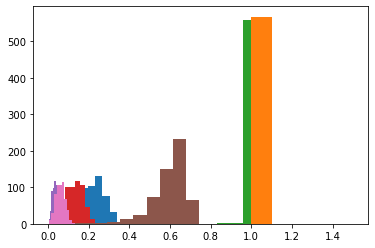

In [91]:
for (name, features) in train_features.items():
    print(name)
    describe_sparsity(features)

_____
## Investigate Unused Features?